In [82]:
import torch, os
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [83]:
datadir = "/home/dominic/11777_project/"

In [107]:
def process_batch(batch, max_X=20, max_Y=17):
    if batch.shape==(0,):
        ret=np.zeros((max_X,max_Y))
    else:
        ret = np.pad(batch[:,678:695], ((0, max_X-batch.shape[0]), (0, 0)), 'constant', constant_values=0)
        
    return ret

total = []
for f in os.listdir(datadir):
    if f.endswith('.npz'):
        a = np.load(f,allow_pickle=True)
        padded = np.array([process_batch(b) for b in a['features']])
        padded = padded.reshape(padded.shape[0]*padded.shape[1],padded.shape[-1])
        #print(padded.shape)
        total.append(padded)
        
features = total[0]
for c in total[1:]:
    features = np.concatenate((features,c))

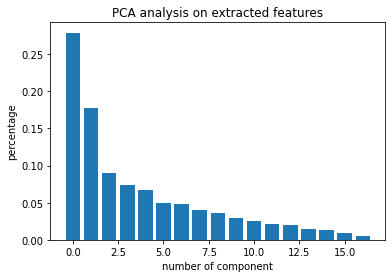

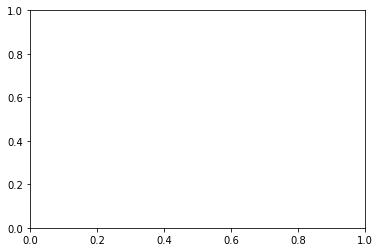

In [108]:
pca = PCA(n_components=17)
pca.fit(features)
r = pca.explained_variance_ratio_

plt.bar(range(len(r)), r)
plt.xlabel('number of component')
plt.ylabel('percentage')
plt.title('PCA analysis on extracted features')
plt.show()
plt.cla()

In [114]:
r

array([0.27890953, 0.17787665, 0.08998854, 0.07318508, 0.06744405,
       0.05015654, 0.04866709, 0.03979765, 0.036423  , 0.02922618,
       0.02512552, 0.02093541, 0.0203012 , 0.01520792, 0.01336532,
       0.00877336, 0.00461696])

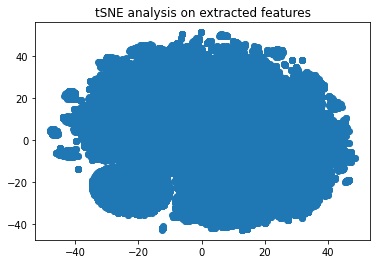

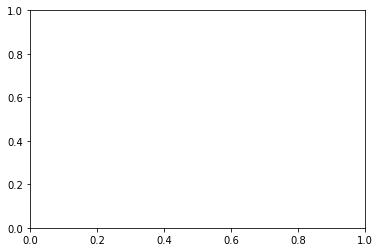

In [110]:
plt.cla()
embedded = TSNE(n_components=2).fit_transform(features)
plt.scatter(embedded.T[0],embedded.T[1])
plt.title('tSNE analysis on extracted features')
plt.show()
plt.cla()

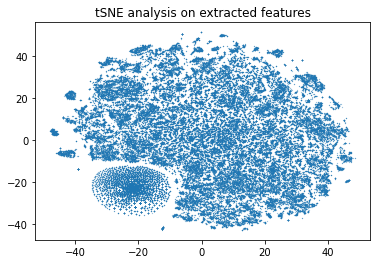

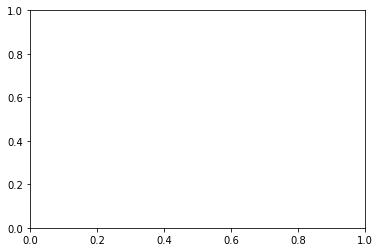

In [113]:
plt.scatter(embedded.T[0],embedded.T[1],s=0.03)
plt.title('tSNE analysis on extracted features')
plt.show()
plt.cla()